<a href="https://colab.research.google.com/github/DamianKluczyn/ML-Mini-Projects/blob/main/Heart_Disease_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

heart_data = pd.read_csv('heart.csv')

# Overview of data

1. age - in years
2. sex - 1=male, 0=female
3. cp - chest pain type (4 values)
4. trestbps - resting blood pressure
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl - 1=true, 0=false
7. restecg - resting electrocardiographic results (values 0,1,2)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal- 0 = normal; 1 = fixed defect; 2 = reversable defect



In [27]:
print(heart_data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [28]:
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [29]:
print(heart_data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

**We have 13 features which can be usefull to predict heart diseases, every feature is int or float with 0 non values**

Distribution of features

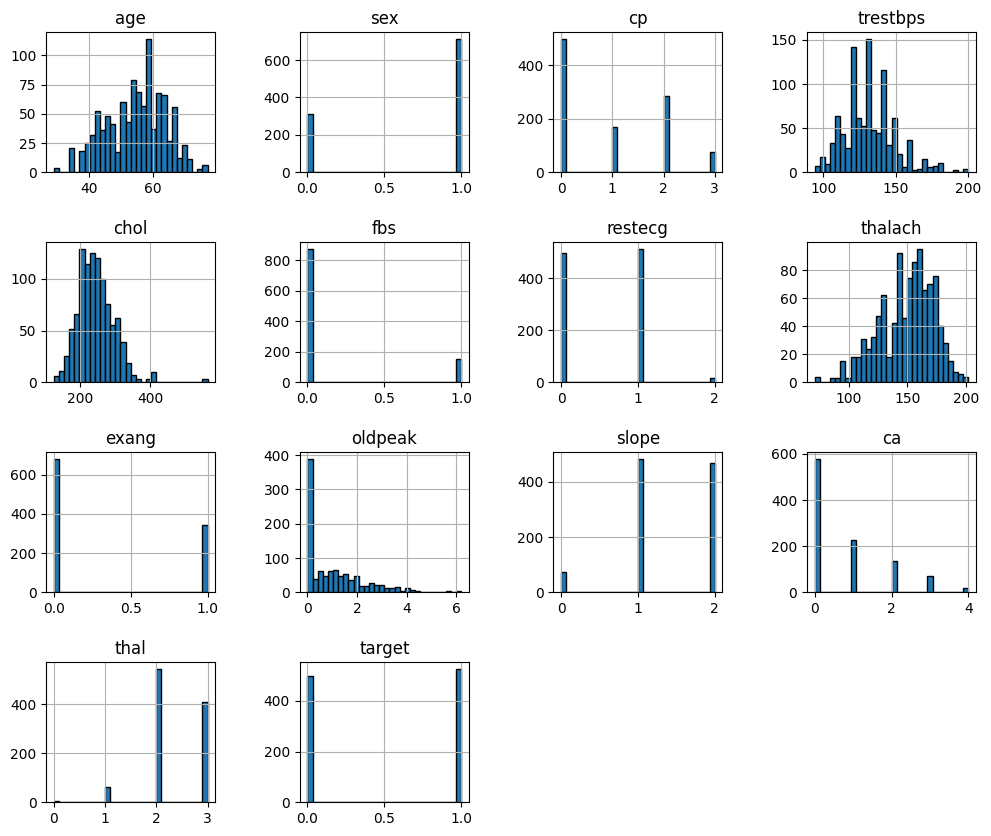

In [12]:
import matplotlib.pyplot as plt

heart_data.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [30]:
print(heart_data.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

Looking at data we can see that most of data have normal distribution with few anomalies like oldpeak and chol having most data within medium values and max value is far away from average

# Data preparation

In [31]:
X = heart_data.iloc[:, :-1].values
Y = heart_data.iloc[:, -1].values

Data normalization

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting data to training and testing

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Model training

In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Predicting values and evaluating model

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[ 77  21]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



# Model optimalization

In [52]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# l1 - Lasso Regression; l2 - Ridge Regression
# liblinear - better algorithm for smaller datasets than sag and saga which are better for larger datasets
param_grid = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}

# Optimalization with testing all the values from 'param_grid'
# cv - number of folds in cross validation
# verbose - function will print more info
# n_jobs - how much cores will function use
clf = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)

# Searching for best model optimalization
best_clf = clf.fit(X_train, Y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Predictions and evaluation

In [53]:
predictions_new = best_clf.predict(X_test)

print("Old model:")
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

print("\nNew model:")
print(confusion_matrix(Y_test, predictions_new))
print(classification_report(Y_test, predictions_new))

Old model:
[[ 77  21]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205


New model:
[[ 77  21]
 [  7 100]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



# As we can see old and new model have exactly same results. This could mean several things:


1.   There was no optimalization needed
2.   Parameter changes did not affect the result
3.   The model is stable - this is very good news as the model is doing well with new data

